# Diamond Quality Analysis

## Frame
If you want to buy one of the best diamonds in the world, what are the different aspects you want to look at? Let's find out how a stone is turned into a precious gem.

It is the **4C's** that differentiates each stone

* Carat
* Cut
* Clarity
* Colour

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13,8)

## Acquire

In [3]:
df = pd.read_csv("./diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Carat
The carat weight measures the mass of a diamond. One carat is defined as 200 milligrams (about 0.007 ounce avoirdupois). The point unit—equal to one one-hundredth of a carat (0.01 carat, or 2 mg)—is commonly used for diamonds of less than one carat. All else being equal, the price per carat increases with carat weight, since larger diamonds are both rarer and more desirable for use as gemstones.

In [4]:
df.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

### Cut
Diamond cutting is the art and science of creating a gem-quality diamond out of mined rough. The cut of a diamond describes the manner in which a diamond has been shaped and polished from its beginning form as a rough stone to its final gem proportions. The cut of a diamond describes the quality of workmanship and the angles to which a diamond is cut. Often diamond cut is confused with "shape".

In [5]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

### Clarity
Diamond clarity is a quality of diamonds relating to the existence and visual appearance of internal characteristics of a diamond called inclusions, and surface defects called blemishes. Inclusions may be crystals of a foreign material or another diamond crystal, or structural imperfections such as tiny cracks that can appear whitish or cloudy. The number, size, color, relative location, orientation, and visibility of inclusions can all affect the relative clarity of a diamond. A clarity grade is assigned based on the overall appearance of the stone under ten times magnification.

![](../img/diamond-clarity.png)

In [6]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

### Colour
The finest quality as per color grading is totally colorless, which is graded as "D" color diamond across the globe, meaning it is absolutely free from any color. The next grade has a very slight trace of color, which can be observed by any expert diamond valuer/grading laboratory. However when studded in jewellery these very light colored diamonds do not show any color or it is not possible to make out color shades. These are graded as E color or F color diamonds.

![](../img/diamond-colors.png)

## Refine
To perform any kind of visual exploration, we will need a numeric values for the cut categories. We need to create a new column with numeric values the cut categories

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["cut_num"] = encoder.fit_transform(df.cut)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [9]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

We need to convert values in color column to numeric values.

In [10]:
encoder = LabelEncoder()
df["color_num"] = encoder.fit_transform(df.color)

df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4,6
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,4,5
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,4,4
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0,1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,4,4


#### Exercise
Create a column **clarity_num** with clarity as numeric value

What is the highest price of D colour diamonds?

## Visual Exploration


We start with histograms and in histograms, the number of bins is an important parameter

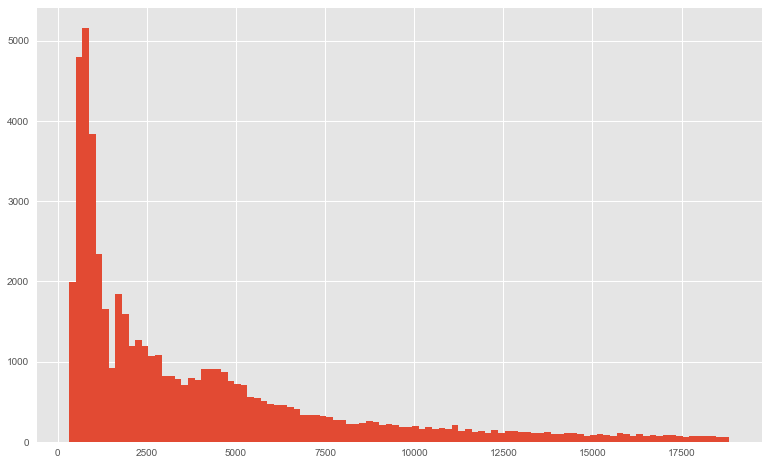

In [11]:
df.price.hist(bins=100)

### Ploting the price after log transformation

Transformation are done to address skewness in the distribution of a variable.



In [12]:
df["price_log"] = np.log10(df.price)

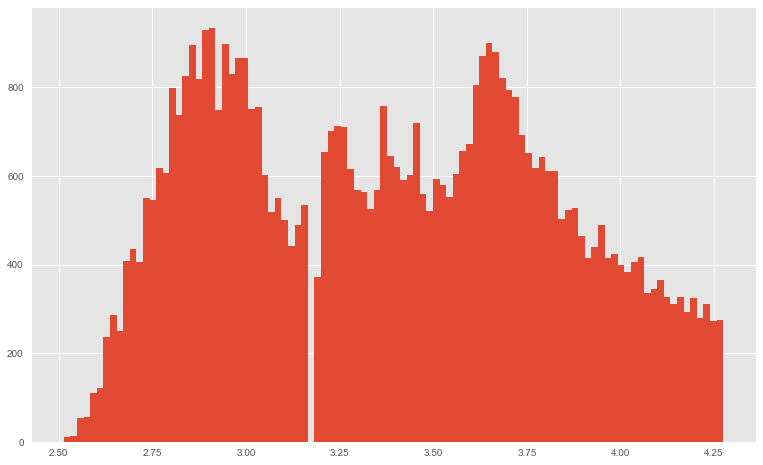

In [13]:
df.price_log.hist(bins=100)

#### Exercise
Plot bar charts for colour_num, cut_num, clarity_num

#### Two variable exploration

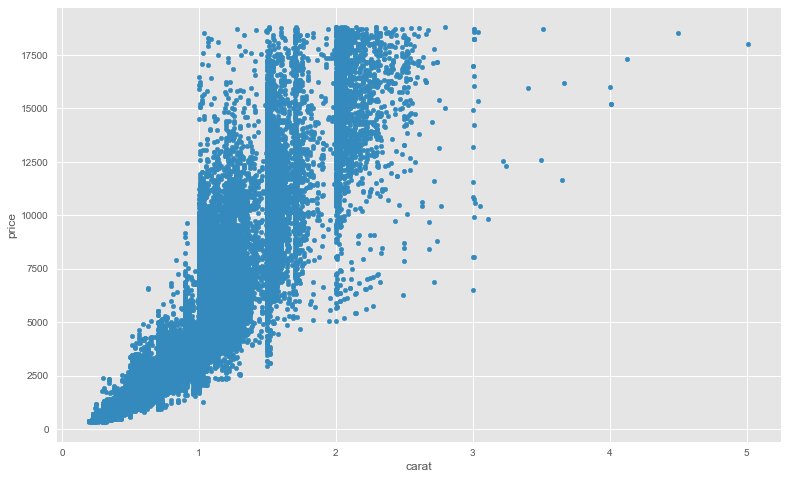

In [14]:
df.plot(x="carat", y="price", kind="scatter")

#### Exercise
Plot the price against carat after tranformation

#### Exercise:
Plot the log transforms for the other C's against price

### Compare how the price change with respect to carat and colour of a diamond

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,2.513218
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2.513218
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,2.514548
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,2.523746
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,2.525045


In [16]:
df['carat_log'] = np.log(df['carat'])

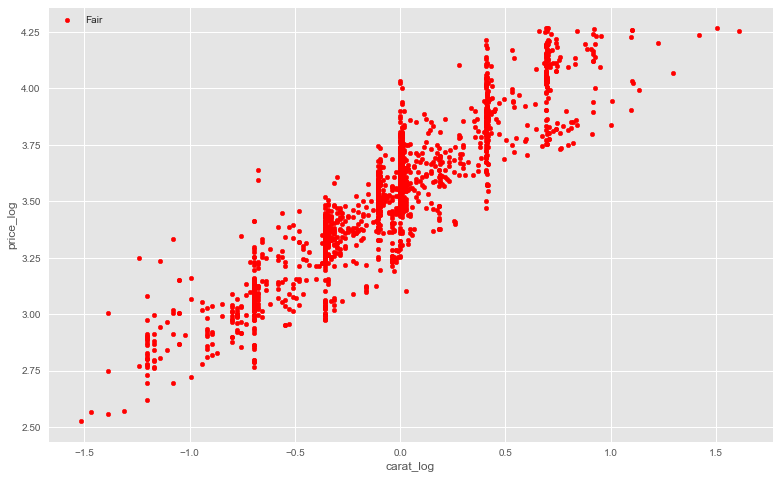

In [17]:
df[df.cut_num == 0].plot(x="carat_log", y="price_log", kind="scatter", color="red", label="Fair")

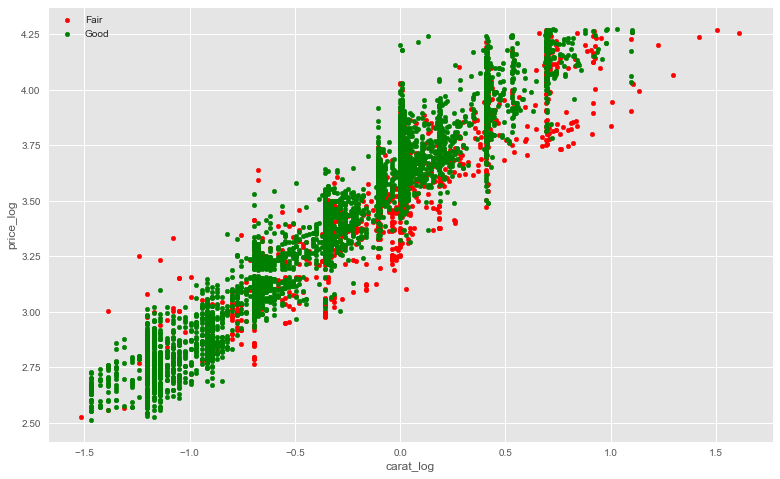

In [18]:
ax = df[df.cut_num == 0].plot(x="carat_log", y="price_log", kind="scatter", color="red", label="Fair")
df[df.cut_num == 1].plot(x="carat_log", y="price_log", kind="scatter", color="green", label="Good", ax=ax)

## Linear Regression


#### Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

    y=β0+β1x

What does each term represent?

* y is the response
* x is the feature
* β0 is the intercept
* β1 is the coefficient for x

Together, β0 and β1 are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Price!


#### Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

![](../img/estimating_coefficients.png)

**What elements are present in the diagram?**

* The black dots are the observed values of x and y.
* The blue line is our least squares line.
* The red lines are the residuals, which are the distances between the observed values and the least squares line.

**How do the model coefficients relate to the least squares line?**
* β0 is the intercept (the value of y when x=0)
* β1 is the slope (the change in y divided by change in x)
Here is a graphical depiction of those calculations:

![](../img/slope_intercept.png)

## Building the linear model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linear_model = LinearRegression()

sklearn expects the dimension of the features to be a 2d array

In [21]:
X_train = df["carat_log"]
X_train.shape

(53940,)

In [22]:
X_train = X_train.reshape(X_train.shape[0],1)
X_train.shape

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


(53940, 1)

In [23]:
y_train = df["price_log"]

Train the model

In [24]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

co-efficient - β1

In [25]:
linear_model.coef_

array([ 0.72779796])

intercept - β0

In [26]:
linear_model.intercept_

3.6692067336547742

### Interpreting Model Coefficients

How do we interpret the carat coefficient (β1)?
Increase in carat is associated with a 1.67581673 increase in Sales.

Note that if an increase in carat was associated with a decrease in price, β1 would be negative.

#### Using the Model for Prediction

    y=β0+β1x

In [27]:
df[['carat_log','price_log']].head()

,carat_log,price_log
0,-1.469676,2.513218
1,-1.560648,2.513218
2,-1.469676,2.514548
3,-1.237874,2.523746
4,-1.171183,2.525045


In [28]:
df[['carat_log','price_log']].tail()

,carat_log,price_log
53935,-0.328504,3.440437
53936,-0.328504,3.440437
53937,-0.356675,3.440437
53938,-0.150823,3.440437
53939,-0.287682,3.440437


In [29]:
X_test = pd.Series([df.carat_log.min(), df.carat_log.max()])
X_test = X_test.reshape(X_test.shape[0],1)


/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [31]:
predicted = linear_model.predict(X_test)
print(predicted)

[ 2.49786111  4.8420065 ]


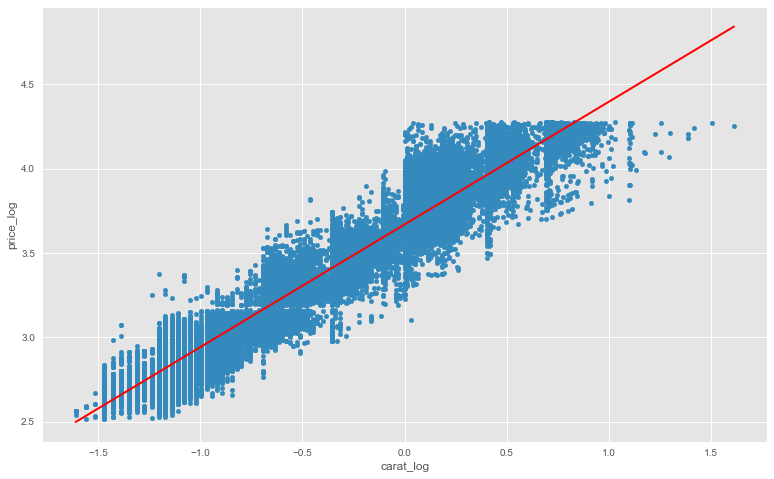

In [32]:
# first, plot the observed data
df.plot(kind='scatter', x='carat_log', y='price_log')

# then, plot the least squares line
plt.plot(X_test, predicted, c='red', linewidth=2)

### How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

![](../img/r_squared.png)

#### Goodness of fit - R2 score

![](../img/r2.gif)


In [33]:
test_samples = pd.Series(predicted)
test_samples = test_samples.reshape(test_samples.shape[0],1)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [34]:
true_values = pd.Series([3.440437, 2.513218])
true_values = true_values.reshape(true_values.shape[0],1)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [35]:
linear_model.score(X_train, df["price_log"].reshape(df["price_log"].shape[0],1))

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


0.93298930795208568

In [36]:
linear_model.coef_

array([ 0.72779796])

In [37]:
linear_model.intercept_

3.6692067336547742

## Using multi variable for regression

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,price_log,carat_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,2.513218,-1.469676
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2.513218,-1.560648
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,2.514548,-1.469676
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,2.523746,-1.237874
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,2.525045,-1.171183


** We need to do one hot encoding on cut **

In [39]:
df_encoded = pd.get_dummies(df["cut_num"])
df_encoded.columns = ['cut_num0', 'cut_num1', 'cut_num2', 'cut_num3', 'cut_num4']
df_encoded.head()

,cut_num0,cut_num1,cut_num2,cut_num3,cut_num4
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,price_log,carat_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,2.513218,-1.469676
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2.513218,-1.560648
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,2.514548,-1.469676
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,2.523746,-1.237874
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,2.525045,-1.171183


**Concatenate the two dataframes**

In [41]:
frames = [df, df_encoded]

df2 = pd.concat(frames, axis=1)
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,price_log,carat_log,cut_num0,cut_num1,cut_num2,cut_num3,cut_num4
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,2.513218,-1.469676,0,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2.513218,-1.560648,0,0,0,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,2.514548,-1.469676,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,2.523746,-1.237874,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,2.525045,-1.171183,0,1,0,0,0


To run the model, we drop one of the dummy variables

In [42]:
X4_train = df2[["carat_log", "cut_num0", "cut_num1", "cut_num2", "cut_num3"]]

In [43]:
X4_train.head()

,carat_log,cut_num0,cut_num1,cut_num2,cut_num3
0,-1.469676,0,0,1,0
1,-1.560648,0,0,0,1
2,-1.469676,0,1,0,0
3,-1.237874,0,0,0,1
4,-1.171183,0,1,0,0


In [44]:
y4_train = df2["price_log"]

In [45]:
y4_train.head()

0    2.513218
1    2.513218
2    2.514548
3    2.523746
4    2.525045
Name: price_log, dtype: float64

In [46]:
X4_train.shape

(53940, 5)

In [47]:
linear_model2 = LinearRegression()

In [48]:
linear_model2.fit(X4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
linear_model2.coef_

array([ 0.73646412, -0.10455782, -0.03366145,  0.03320541, -0.00110143])

In [50]:
pd.set_option("precision", 4)

In [51]:
pd.DataFrame(linear_model2.coef_)

,0
0,0.7365
1,-0.1046
2,-0.0337
3,0.0332
4,-0.0011


In [52]:
linear_model2.intercept_

3.6658268586801706

In [53]:
X4_test = pd.Series([-0.508638, 0, 1, 0, 0])

In [54]:
X4_test

0   -0.5086
1    0.0000
2    1.0000
3    0.0000
4    0.0000
dtype: float64

In [55]:
X4_test.shape

(5,)

In [56]:
linear_model2.predict(X4_test.reshape(1,5))

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


array([ 3.25757178])

In [62]:
predicted = linear_model2.predict(X4_test)
print(predicted)

[ 3.25757178]


/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [63]:
y_train[4]

2.5250448070368452

In [64]:
true_values = pd.Series([y_train[4]])

In [65]:
X4_test

0   -0.5086
1    0.0000
2    1.0000
3    0.0000
4    0.0000
dtype: float64

In [66]:
X4_test.shape

(5,)

In [67]:
X4_test = X4_test.reshape(1,5)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [68]:
X4_test

array([[-0.508638,  0.      ,  1.      ,  0.      ,  0.      ]])

In [69]:
true_values

0    2.525
dtype: float64

In [70]:
linear_model2.score(X4_test, true_values)

0.0

In [71]:
linear_model2.coef_

array([ 0.73646412, -0.10455782, -0.03366145,  0.03320541, -0.00110143])

In [72]:
linear_model.intercept_

3.6692067336547742